## Objective Try, Test and Verify Performance of DADA on Custom Dataset

1. Load Data
2. Change Data Format for DADA
3. Generate Anomaly Scores
4. Visualize Results

In [26]:
# imports
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
# Read data
BASE_PATH = "C:/Users/rishit.somvanshi/OneDrive - AGC/Data Sharing/AMG/labelled_data"
df = pd.read_csv(os.path.join(BASE_PATH, "labelled_9_63.csv"))
df.head()

,speed,indo_time,arrival,pred_label
0,62519,2024-09-06 08:30:41+07:00,0,0
1,62897,2024-09-06 08:30:42+07:00,0,0
2,62323,2024-09-06 08:30:43+07:00,0,0
3,62798,2024-09-06 08:30:44+07:00,0,0
4,62558,2024-09-06 08:30:45+07:00,0,0


In [5]:
df.describe()

,speed,arrival,pred_label
count,100000.000000,100000.000000,100000.000000
mean,62871.666980,0.004750,0.043050
std,255.312665,0.068757,0.202971
min,61775.000000,0.000000,0.000000
25%,62668.000000,0.000000,0.000000
50%,62861.000000,0.000000,0.000000
75%,63073.000000,0.000000,0.000000
max,65468.000000,1.000000,1.000000


### 1. Change Data Format for DADA

cols = [date, data, cols]

Will be tested against pred labels

In [7]:
df.drop(['indo_time', 'arrival'], axis = 1, inplace=True)
df.rename(columns={'pred_label': 'label'}, inplace = True)
df.index.name = 'date'
df.reset_index(inplace=True)
df.head()

,date,speed,label
0,0,62519,0
1,1,62897,0
2,2,62323,0
3,3,62798,0
4,4,62558,0


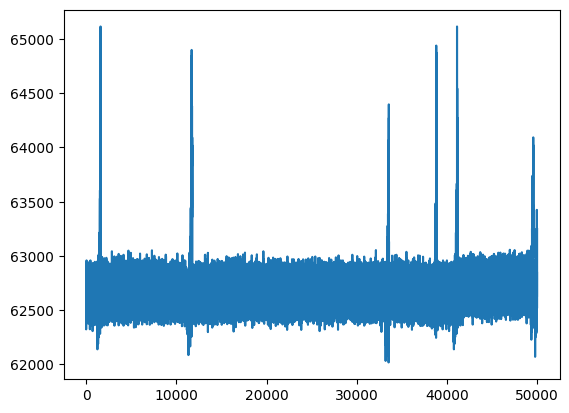

In [28]:
# Will generate scors for this data
df = df.iloc[:int(50e3)]
plt.plot(df.speed.values)

In [29]:
# pandas.melt() reshapes a DataFrame from wide format to long format
data = pd.melt(df, id_vars='date', value_name='data', var_name='cols') # transforming 
data = data[['date', 'data', 'cols']]
data

,date,data,cols
0,0,62519,speed
1,1,62897,speed
2,2,62323,speed
3,3,62798,speed
4,4,62558,speed
...,...,...,...
99995,49995,1,label
99996,49996,1,label
99997,49997,1,label
99998,49998,1,label


In [32]:
# Save it to evaluation_dataset
DIR_PATH = "./dataset/evaluation_dataset/data"
if not os.path.exists(DIR_PATH):
    os.makedirs(DIR_PATH)
data.to_csv(os.path.join(DIR_PATH, "custom.csv"), index = False)

,date,data,cols
0,0,62519,speed
1,1,62897,speed
2,2,62323,speed
3,3,62798,speed
4,4,62558,speed


In [ ]:
!python -u run.py --metric auc --norm 0 --use_gpu True --gpu 0 --root_path ./dataset/evaluation_dataset --data CUSTOM --model ./DADA --des 'zero_shot' --batch_size 128